# Module 7: Assignment
## Aaron Hum
### Stephanie Moyerman, PhD
#### LSC 541: Statistics for Biological Data Science I
##### 2024-08-08

In [2]:
install.packages(c("lme4", "ggplot2", "knitr", "rmarkdown", "reshape2"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘plyr’




In [3]:
# Load required libraries
library(lme4)
library(ggplot2)
library(knitr)
library(rmarkdown)
library(reshape2)

Loading required package: Matrix



In [7]:
# Read the data
data <- read.table('tlc-data.txt', header = FALSE, col.names = c("SubjectID", "Group", "Baseline", "Week1", "Week4", "Week6"))
data

SubjectID,Group,Baseline,Week1,Week4,Week6
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,P,30.8,26.9,25.8,23.8
2,A,26.5,14.8,19.5,21.0
3,A,25.8,23.0,19.1,23.2
4,P,24.7,24.5,22.0,22.5
5,A,20.4,2.8,3.2,9.4
6,A,20.4,5.4,4.5,11.9
7,P,28.6,20.8,19.2,18.4
8,P,33.7,31.6,28.5,25.1
9,P,19.7,14.9,15.3,14.7


In [13]:
# Melting the data for easy plotting
data_melted <- reshape2::melt(data, id.vars = c("SubjectID", "Group"),
                              variable.name = "Time", value.name = "BloodLeadLevel")
data_melted

SubjectID,Group,Time,BloodLeadLevel
<int>,<chr>,<fct>,<dbl>
1,P,Baseline,30.8
2,A,Baseline,26.5
3,A,Baseline,25.8
4,P,Baseline,24.7
5,A,Baseline,20.4
6,A,Baseline,20.4
7,P,Baseline,28.6
8,P,Baseline,33.7
9,P,Baseline,19.7


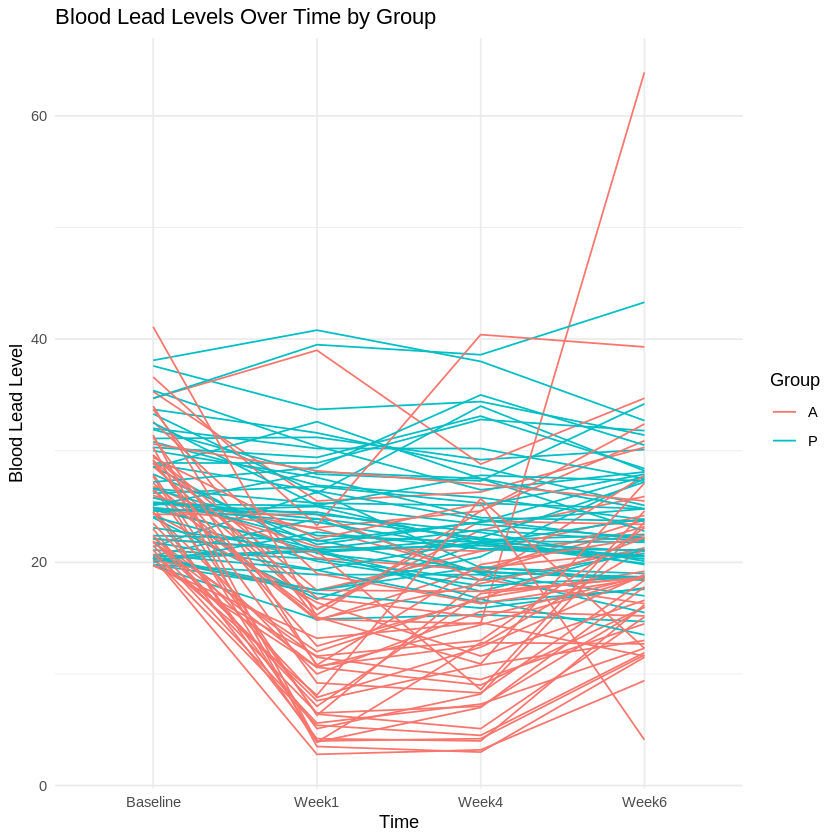

In [16]:
# Plot trajectories of blood lead levels over time for each subject
p <- ggplot(data_melted, aes(x = Time, y = BloodLeadLevel, group = SubjectID, color = Group)) +
     geom_line() +
     labs(title = "Blood Lead Levels Over Time by Group", x = "Time", y = "Blood Lead Level") +
     theme_minimal()
p

In [20]:
# Mixed effects model with random intercept
model1 <- lmer(BloodLeadLevel ~ Time + Group + (1|SubjectID), data = data_melted)
summary_model1 <- summary(model1)
summary_model1

Linear mixed model fit by REML ['lmerMod']
Formula: BloodLeadLevel ~ Time + Group + (1 | SubjectID)
   Data: data_melted

REML criterion at convergence: 2564

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2841 -0.5432  0.0038  0.4504  6.9510 

Random effects:
 Groups    Name        Variance Std.Dev.
 SubjectID (Intercept) 24.48    4.947   
 Residual              24.42    4.941   
Number of obs: 400, groups:  SubjectID, 100

Fixed effects:
            Estimate Std. Error t value
(Intercept)  23.6173     0.8915  26.492
TimeWeek1    -7.3150     0.6988 -10.468
TimeWeek4    -6.6140     0.6988  -9.465
TimeWeek6    -4.2020     0.6988  -6.013
GroupP        5.5775     1.1060   5.043

Correlation of Fixed Effects:
          (Intr) TimWk1 TimWk4 TimWk6
TimeWeek1 -0.392                     
TimeWeek4 -0.392  0.500              
TimeWeek6 -0.392  0.500  0.500       
GroupP    -0.620  0.000  0.000  0.000